# TASK

**Please upload all the files shared to me for analysis before running each step**

In the folder is

•	Land Registry Price Paid data for Birmingham and Solihull Local Authorities

    o	Since January 2009
    o	We have added on ONS census area info (OA and LSOA)
            * Eastings and Northings
            * Latitude and Longitude
•	A shapefile showing the planned route of HS2 (The new high speed rail to London)
•	VOA data showing counts of 

    o	Property type by LSOA and year
    o	Property age groupings by LSOA and year

The task is to tell us what is happening in the subject area property market through analytical means, and perhaps isolate characteristics of the markets.


**Installing all the necessary libraries**

In [ ]:
pip install geopandas

**Importing all the libraries used in the project**

In [258]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from geopandas import GeoDataFrame
from sklearn import linear_model
import statsmodels.api as sm

**Reading the data from Land Registry Price Paid Data.csv**

In [ ]:
price_paid_data_df = pd.read_csv('Land Registry Price Paid Data.csv', sep = '\t')
price_paid_data_df.head()

**Understanding the data and general analysis**

In [ ]:
price_paid_data_df['Add6'].unique()

**Creating a dataframe with Add6 as Birmingham and Solihull**

In [ ]:
price_paid_data_df_xx = price_paid_data_df.loc[price_paid_data_df['Add6'].isin(['BIRMINGHAM', 'SOLIHULL'])]
price_paid_data_df_xx

**Splitting SaleDate column to get the date and also dropping few unused columns**

In [ ]:
price_paid_data_df_xx[['Sale_day', 'Sale_month', 'Sale_year']] = price_paid_data_df_xx['SaleDate'].str.split('/', expand = True)

In [ ]:
land_reg_df = price_paid_data_df_xx.drop(['Add1', 'Add2', 'Add3', 'Add4', 'Add5', 'Add7', 'Sale_day', 'Sale_month'], axis = 1)
land_reg_df

In [ ]:
land_reg_df.info()

**Creating a dataframe by grouping sale_year to get number of houses sold in that year**

In [ ]:
total_house = land_reg_df['Sale_year'].value_counts()
total_house = total_house.to_frame()
ll = total_house.reset_index()

house_sale_by_years = ll.rename(columns = {'index': 'Sale_year', 'Sale_year' : 'Total_houses'})
house_sale_by_year = house_sale_by_years.sort_values(by = ['Sale_year'])
house_sale_by_year

**Creating a dataframe by grouping sale_year to get average sale price in that year**

In [ ]:
mm = land_reg_df.groupby('Sale_year')['SalePrice'].mean()
mm = mm.to_frame()
Sale_price_by_year = mm.reset_index()

Sale_price_by_year

**Merging both the house_sale_by_year and Sale_price_by_year into one single dataframe**

In [ ]:
kk_sales = house_sale_by_year.merge(Sale_price_by_year, left_on = 'Sale_year', right_on = 'Sale_year')
kk_sales

**Plotting a bar chart to show how the prices have increased and also to see how many houses are sold over the years**

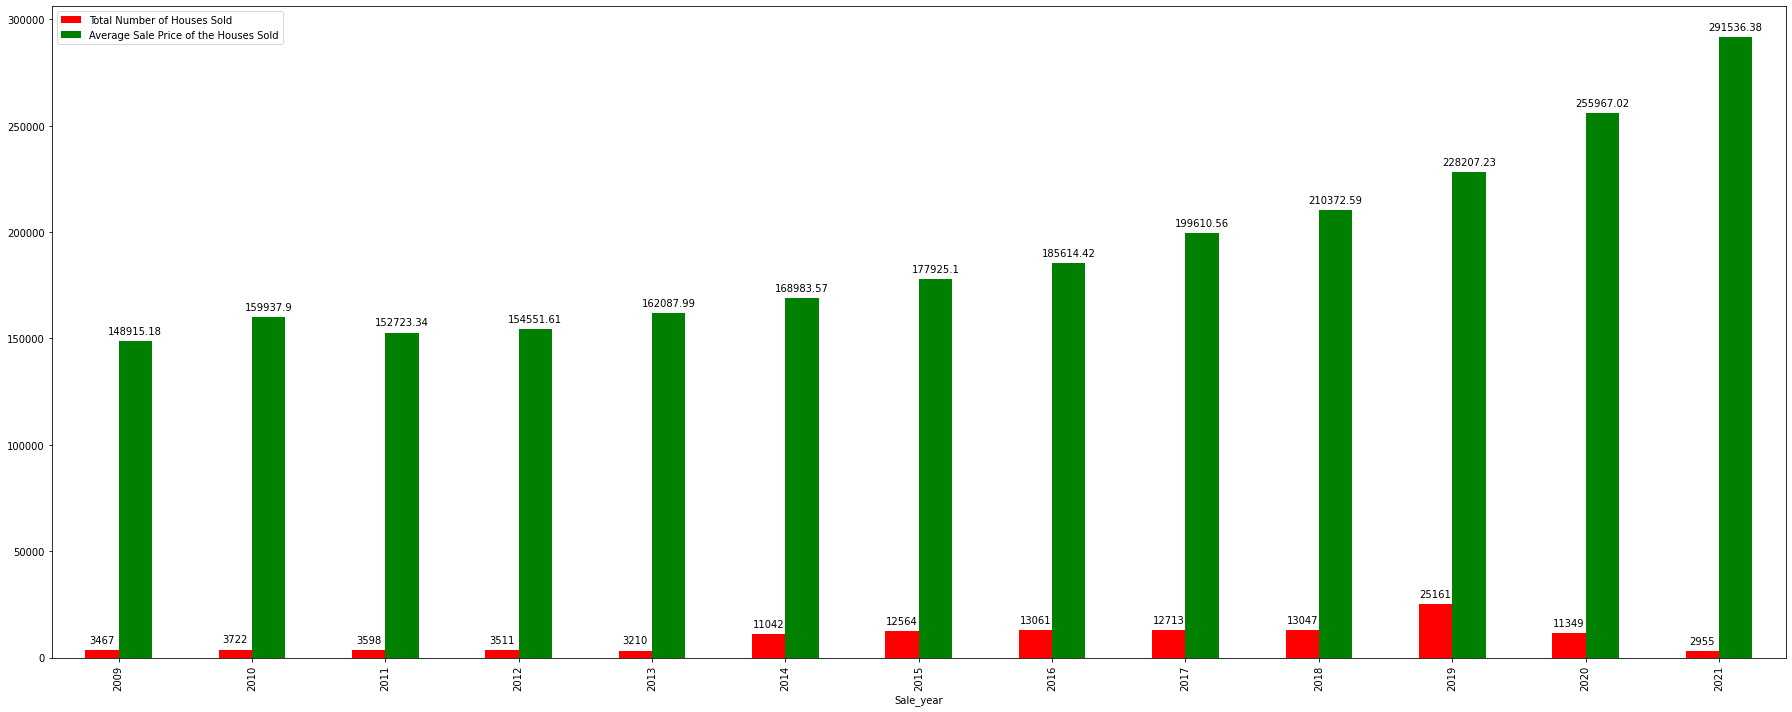

In [268]:
ax = kk_sales.plot(x='Sale_year', y=['Total_houses', 'SalePrice'], kind='bar', color=['r','g'],figsize=(25, 10)) 
ax.legend(["Total Number of Houses Sold", "Average Sale Price of the Houses Sold"])
for p in ax.patches:
    ax.annotate(s=np.round(p.get_height(), decimals=2),
                xy=(p.get_x()+p.get_width()/2., p.get_height()),
                ha='center',
                va='center',
                xytext=(0, 10),
                textcoords='offset points')

plt.show()

**Understanding the data and general analysis**

In [ ]:
price_paid_data_df.Add7.unique()

In [ ]:
# price_paid_data_df.columns, price_paid_data_df.dtypes
price_paid_data_df['SalePrice'].max(),price_paid_data_df['SalePrice'].min()

In [ ]:
price_paid_data_df.nunique()

**Understanding if any duplicates can be dropped from price_paid_data_df**

In [ ]:
price_paid_data_df.shape, price_paid_data_df['LRUniqueID'].nunique(), price_paid_data_df.drop_duplicates().shape

**To understand if the sale price is high under any specific local authority**

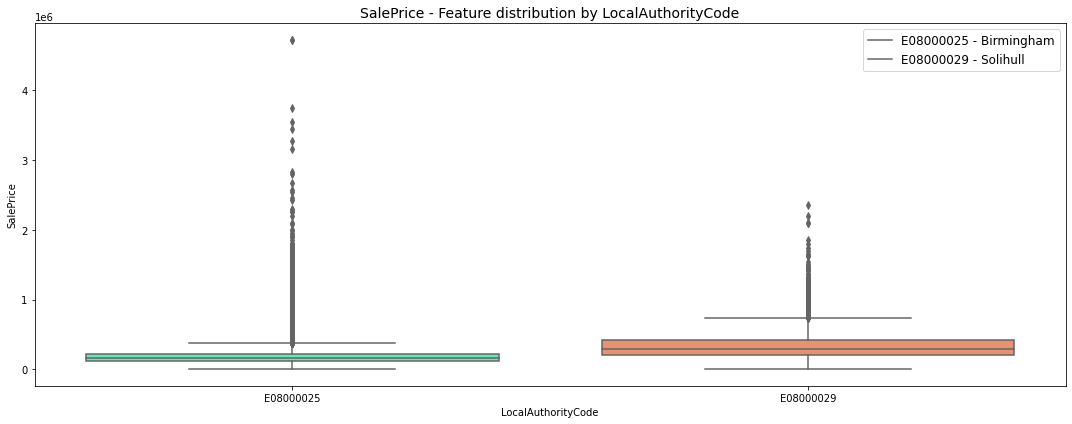

In [273]:
colors = ['#56F9BB', '#FB8861']

i = 'SalePrice'

f, ax = plt.subplots(1, 1, figsize=(15,6))
sns.boxplot(x='LocalAuthorityCode', y='{0}'.format(i), data=price_paid_data_df, palette=colors, ax=ax)
ax.set_title('{} - Feature distribution by LocalAuthorityCode'.format(i), fontsize=14)
ax.legend(["E08000025 - Birmingham", "E08000029 - Solihull"],fontsize=12)
plt.show()

**Reading the shape file provided**

In [ ]:
shapefile = gpd.read_file("HS2.shp")
print(shapefile)

**Understanding the data in the shape file**

In [ ]:
shapefile.head()['geometry']

In [ ]:
shapefile.columns

In [ ]:
shapefile['geometry'].unique()

In [ ]:
shapefile['geometry'].values[0]

In [ ]:
shapefile.total_bounds

**Plotting the shape file data to see how it is distributed around Easting and Northing**

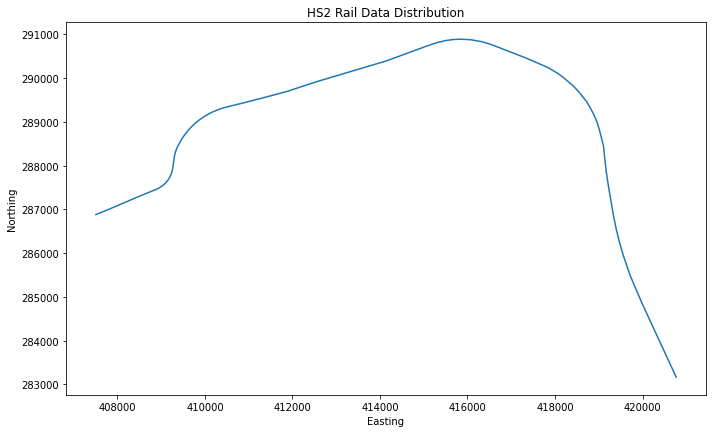

In [280]:
fig, ax = plt.subplots(figsize = (10,10))
shapefile.plot(ax=ax)
ax.title.set_text('HS2 Rail Data Distribution')
ax.set(xlabel="Easting",ylabel="Northing")
plt.show()

**Plotting to see how the local authority is distributed around Easting and Northing**

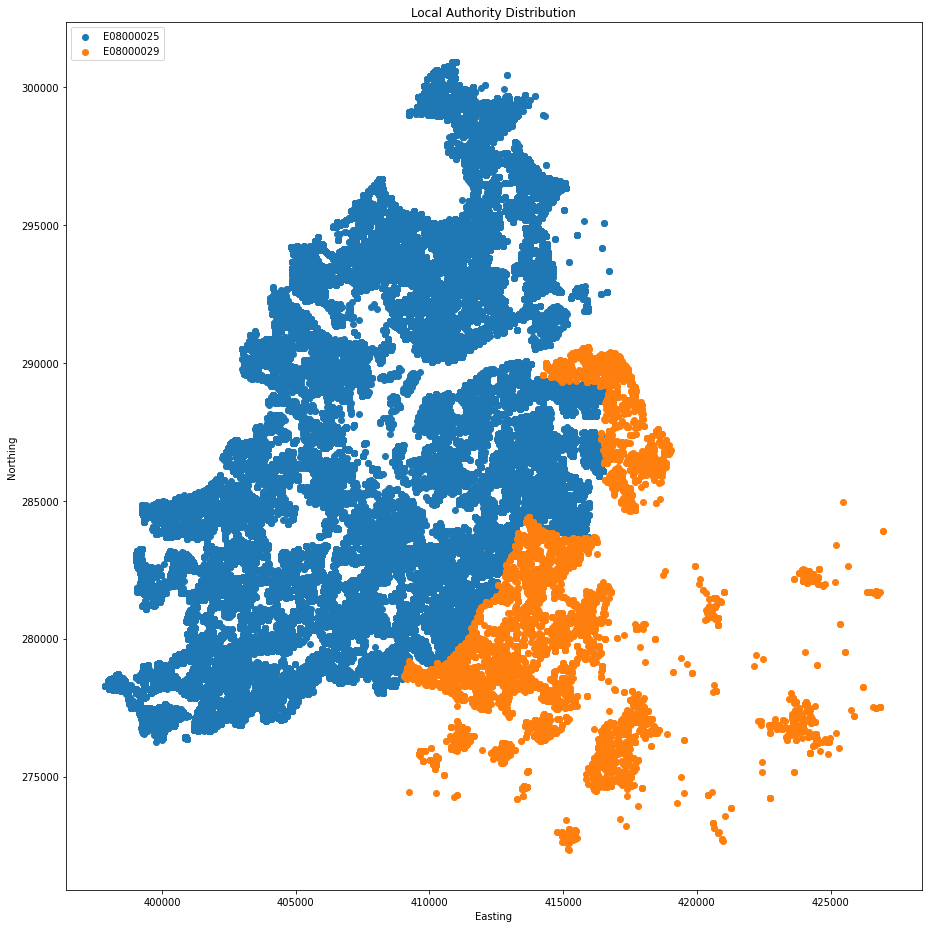

In [281]:
fig,ax = plt.subplots(figsize=(13, 13))
ax.title.set_text('Local Authority Distribution')
ax.set(xlabel="Easting",ylabel="Northing")
for k,d in price_paid_data_df.groupby('LocalAuthorityCode'):
    ax.scatter(d['Easting'], d['Northing'], label=k)
plt.legend(loc=2)
# plt.savefig('scatter.png')
plt.show()

**Plotting the Freehold and Leased type properties to see their distribution around Easting and Northing**

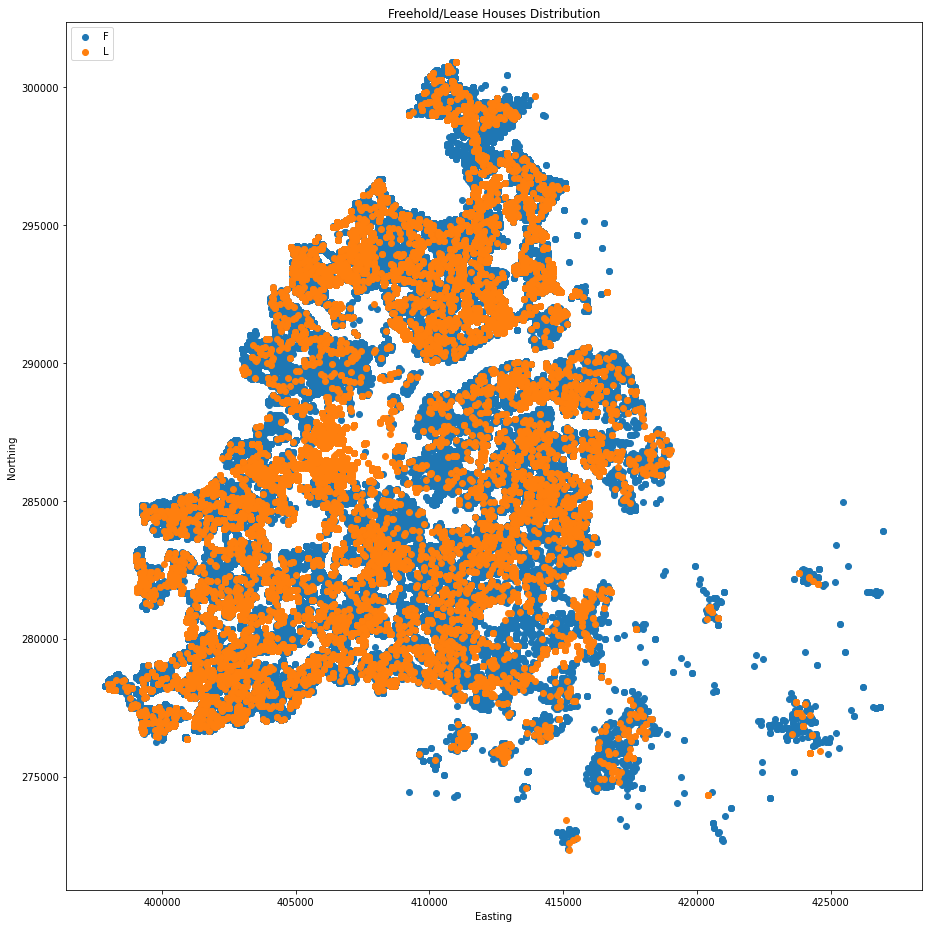

In [282]:
fig,ax = plt.subplots(figsize=(13, 13))
ax.title.set_text('Freehold/Lease Houses Distribution')
ax.set(xlabel="Easting",ylabel="Northing")
for k,d in price_paid_data_df.groupby('Freehold'):
    ax.scatter(d['Easting'], d['Northing'], label=k)
plt.legend(loc=2)
# plt.savefig('scatter.png')
plt.show()

**Plotting to see how the properties of each type are distributed around Easting and Northing**

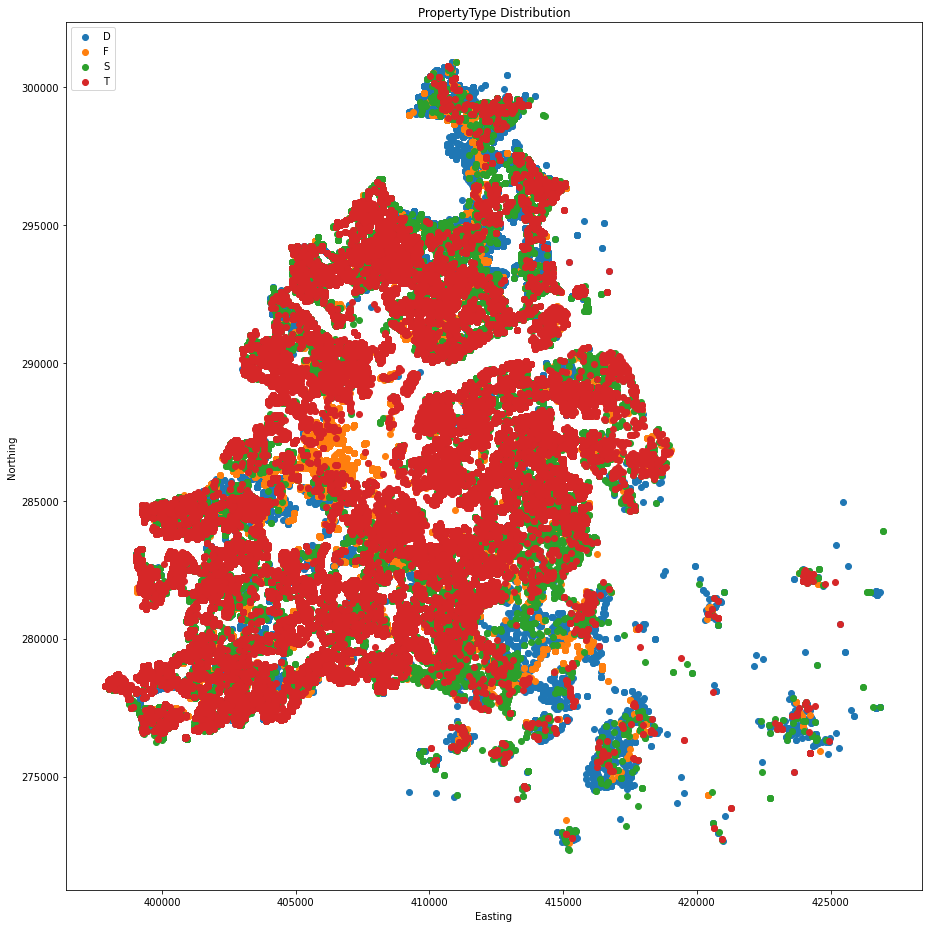

In [283]:
fig,ax = plt.subplots(figsize=(13, 13))
ax.title.set_text('PropertyType Distribution')
ax.set(xlabel="Easting",ylabel="Northing")
for k,d in price_paid_data_df.groupby('PropertyType'):
    ax.scatter(d['Easting'], d['Northing'], label=k)
plt.legend(loc=2)
# plt.savefig('scatter.png')
plt.show()

**Reading the data from VOA Property Age Data.csv**

In [ ]:
age_data_df = pd.read_csv('VOA Property Age Data.csv', sep = '\t')
age_data_df.head()

**Understanding the data and general analysis**

In [ ]:
age_data_df.shape

**Reading the data from VOA Property Type Data.csv**

In [ ]:
type_data_df = pd.read_csv('VOA Property Type Data.csv', sep = '\t')
type_data_df

**Replacing Nan values with 0 in type_data_df**

In [ ]:
type_data_df.fillna(0, inplace=True)
type_data_df

**Considering Bungalow1, Bungalow2, Bungalow3, Bungalow3plus, Bungalow4plus, BungalowZ columns as number of houses sold under each LSOA combining them into one column by adding and did the same with other property type columns**

In [ ]:
type_data_df['Bungalow'] = type_data_df['Bungalow1'] + type_data_df['Bungalow2'] + type_data_df['Bungalow3'] + type_data_df['Bungalow3plus'] + type_data_df['Bungalow4plus'] + type_data_df['BungalowZ']
type_data_df['Flats'] = type_data_df['Flat_Mais1'] + type_data_df['Flat_Mais2'] + type_data_df['Flat_Mais3'] + type_data_df['Flat_Mais3plus'] + type_data_df['Flat_Mais4plus'] + type_data_df['Flat_MaisZ']
type_data_df['House_Detached'] = type_data_df['House_Detached1'] + type_data_df['House_Detached2'] + type_data_df['House_Detached3'] + type_data_df['House_Detached3plus'] + type_data_df['House_Detached4plus'] + type_data_df['House_DetachedZ']
type_data_df['House_Terraced'] = type_data_df['House_Terraced1'] + type_data_df['House_Terraced2'] + type_data_df['House_Terraced3'] + type_data_df['House_Terraced3plus'] + type_data_df['House_Terraced4plus'] + type_data_df['House_TerracedZ']
type_data_df['House_Semi'] = type_data_df['House_Semi1'] + type_data_df['House_Semi2'] + type_data_df['House_Semi3'] + type_data_df['House_Semi3plus'] + type_data_df['House_Semi4plus'] + type_data_df['House_SemiZ']
type_data_df['Others'] = type_data_df['Other'] + type_data_df['UNKNOWN']

type_data_df

**Dropping the columns after creating sum columns**

In [289]:
prop_type_data = type_data_df.drop(['Annexe','Bungalow1', 'Bungalow2', 'Bungalow3', 'Bungalow3plus', 'Bungalow4plus', 'BungalowZ','Flat_Mais1', 'Flat_Mais2', 'Flat_Mais3', 'Flat_Mais3plus', 'Flat_Mais4plus', 'Flat_MaisZ','House_Detached1', 'House_Detached2', 'House_Detached3', 'House_Detached3plus', 'House_Detached4plus', 'House_DetachedZ','House_Terraced1', 'House_Terraced2', 'House_Terraced3', 'House_Terraced3plus', 'House_Terraced4plus', 'House_TerracedZ','House_Semi1', 'House_Semi2', 'House_Semi3', 'House_Semi3plus', 'House_Semi4plus', 'House_SemiZ','Other','UNKNOWN'], axis=1)
prop_type_data.to_csv("prop_type_data.csv")

**Seeing how many and what common records records can be retrieved based on LSOA code from the cleaned main dataset which is land_reg_df**

In [ ]:
nn = land_reg_df[land_reg_df["CensusLSOA"].isin(prop_type_data["CODE"])]
nn

**Creating a dataframe to genearate correlation heatmap**

In [291]:
heatmap_df = land_reg_df[['PropertyType','NewBuild','Freehold','PCUnit','Sale_year','Latitude','Longitude','SalePrice']]

heatmap_df['Sale_year'].unique()

array(['2019', '2020', '2021', '2013', '2010', '2011', '2009', '2012',
       '2014', '2017', '2018', '2015', '2016'], dtype=object)

In [292]:
heatmap_df['Sale_year'].unique()

array(['2019', '2020', '2021', '2013', '2010', '2011', '2009', '2012',
       '2014', '2017', '2018', '2015', '2016'], dtype=object)

**Categorizing non integer values**

In [ ]:
heatmap_df['PropertyType']=heatmap_df['PropertyType'].astype('category').cat.codes
heatmap_df['PCUnit']=heatmap_df['PCUnit'].astype('category').cat.codes
heatmap_df['NewBuild']=heatmap_df['NewBuild'].astype('category').cat.codes
heatmap_df['Freehold']=heatmap_df['Freehold'].astype('category').cat.codes
heatmap_df['Latitude']=heatmap_df['Latitude'].astype('category').cat.codes
heatmap_df['Longitude']=heatmap_df['Longitude'].astype('category').cat.codes
heatmap_df['Sale_year']=heatmap_df['Sale_year'].astype('category').cat.codes

heatmap_df

In [294]:
heatmap_df['Sale_year'].unique()

array([10, 11, 12,  4,  1,  2,  0,  3,  5,  8,  9,  6,  7], dtype=int8)

**Plotting a heatmap to see the correlation between features**

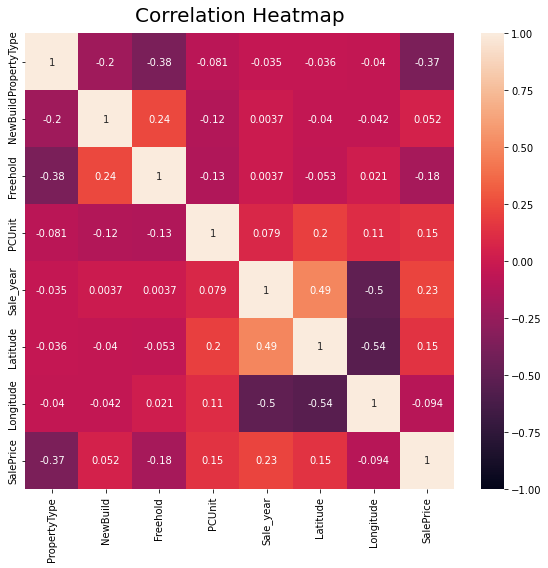

In [295]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(heatmap_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12);

**Set x, and y variables to train and test linear regression model**

In [ ]:
x = heatmap_df[['PropertyType','NewBuild','Freehold','PCUnit','Sale_year','Latitude','Longitude']]
y = heatmap_df['SalePrice']
x,y

**Training the model and predicting**

In [297]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

x = sm.add_constant(x) 
 
model = sm.OLS(y, x).fit()
predictions = model.predict(x) 
 
print_model = model.summary()
print(print_model)

Intercept: 
 282140.81099447503
Coefficients: 
 [-6.77248733e+04  2.14091859e+04 -1.13834024e+05  8.83148971e-01
  9.42036107e+03 -6.51032182e-02 -2.08795212e-01]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     7497.
Date:                Mon, 08 Aug 2022   Prob (F-statistic):               0.00
Time:                        15:20:20   Log-Likelihood:            -1.5615e+06
No. Observations:              119400   AIC:                         3.123e+06
Df Residuals:                  119392   BIC:                         3.123e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         2.821e+05   2060.400    136.935   

**Example price prediction**

In [300]:
predictedPrice = regr.predict([[1,1,1,183,16,21822,2946]])
predictedPrice

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([270842.70002269])

**Plotting Latitude and Longitude data to see if they are accurate**

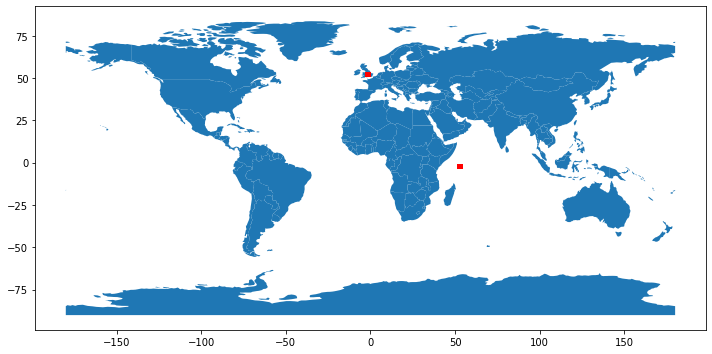

In [299]:
geometry = [Point(xy) for xy in zip(land_reg_df['Longitude'], land_reg_df['Latitude'])]
gdf = GeoDataFrame(land_reg_df, geometry=geometry)   

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=15, label="A")
# To restrict the map to United Kingdom
# ax = world[(world.name == "United Kingdom")].plot(color='white', edgecolor='black')
# gdf.plot(ax=ax, color='red')
# plt.show()